# Line-of-sight sampling
This notebook starts from a posterior distribution in the angular diameter distances infered from a strong gravitational lens time-delay analysis (TDSL) that has not yet been corrected for the line-of-sight contribution. The notebook reads-in the files and post-processes the external convergences and then saves those files as the final posteriors.

In [1]:
import numpy as np
import os
import pickle

import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.patches as mpatches

%matplotlib inline

cwd = os.getcwd()
base_path, _ = os.path.split(cwd)

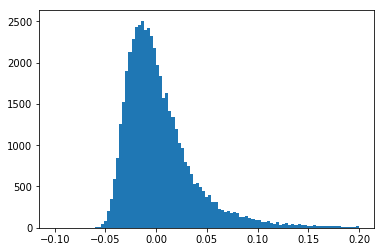

-0.003989534930386585 0.005210819641515942 0.041154649764267845


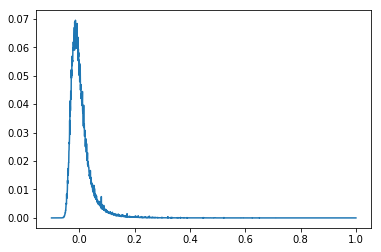

0.00536026591197984


In [3]:
# ====================================
# LENS REDSHIFTS AND DEFAULT COSMOLOGY
# ====================================

# redshifts
z_d = 0.745
z_s = 1.789


# =========================
# LINE-OF-SIGHT CONVERGENCE
# =========================

# this is the convergence distribution used in Birrer et al. 2018

kappa_file = 'kappahist_J1206_measured_5innermask_nobeta_zgap-1.0_-1.0_fiducial_120_gal_120_zoverr_45_gal_45_zoverr_24_med_increments4_4_4_4.cat'
path2kappa = os.path.join(base_path, 'DATA', 'LOS', kappa_file)
output = np.loadtxt(path2kappa)
kappa_list = np.linspace(-0.1, 1, len(output))
pdf_list = output
from lenstronomy.Util.prob_density import Approx
pdf_approx = Approx(kappa_list, pdf_list)
pdf_draw = pdf_approx.draw(n=50000)
plt.hist(pdf_draw, bins=np.linspace(-0.1, 0.2, 100))
plt.show()
print(np.median(pdf_draw), np.mean(pdf_draw), np.std(pdf_draw))

plt.plot(kappa_list, output)
plt.show()

mean_kappa = np.sum(kappa_list*output) / np.sum(output)
print(mean_kappa)
std_kappa = 'test'

def draw_kappa(n=1):
    return pdf_approx.draw(n=n)

In [24]:
# we import posterior samples from the analysis pre-LOS
input_name = 'test.txt'  # pickle file with [Dd_ds_dds_samples, D_d_samples, kappa_pert] samples from combined analysis of imaging,  kinematic and time delays
# and assign the post-processed posterior a name
processed_name = 'test'

# we saved the following distributions (you can process more if you like):
# - 'angular_diameter_pre_LOS.txt': the final BIC selected sample, processed name: 'final'
# - 'angular_diameter_pre_LOS_all.txt': combination of all models regardless of BIC values, processed name: 'marginalize_all'
# - 'angular_diameter_pre_LOS_power_law.txt': BIC selection of the power-law profiles, processed name: 'final_power_law'
# - 'angular_diameter_pre_LOS_composite.txt': BIC selection of the composite profiles, processed name: 'final_composite'

file_name = os.path.join(base_path, 'Posteriors', input_name)
f = open(file_name)
[Dd_ds_dds_samples, D_d_samples, kappa_pert] = pickle.load(f)
f.close()
n_enhance = 2  # draws from each posterior n_enhance numbers from the kappa_ext distribution, this ensures a smooth final posterior distribution for a good KDE likelihood computation
Dd_ds_dds_samples = np.repeat(Dd_ds_dds_samples, n_enhance)
print(len(D_d_samples))
D_d_samples = np.repeat(D_d_samples, n_enhance)
kappa_pert = np.repeat(kappa_pert, n_enhance)

# set kappa_pert = 0 if you do not agree with the subtraction
#kappa_pert = 0

kappa_ext = pdf_approx.draw(n = len(Dd_ds_dds_samples)) - kappa_pert
Dd_ds_dds_samples /= (1 - kappa_ext)
D_dt_samples = Dd_ds_dds_samples * (1 + z_d)
    
np.random.seed(1206)

D_dt_samples_save = D_dt_samples[(D_dt_samples >= 0) & (D_d_samples >= 0)]
D_d_samples_save = D_d_samples[(D_dt_samples >= 0) & (D_d_samples >= 0)]
np.save(name+'_D_dt.npy', D_dt_samples_save)
np.save(name+'_D_d.npy', D_d_samples_save)


33848
1230.47625397
5854.735165912209
1804.2437530184063
67696
-4.547473508864641e-13
